In [12]:
#ZADANIE 1
import numpy as np
from decimal import Decimal

a = np.arange(1, 101)
b = np.arange(1, 100, 2)
c = np.arange(-1.0, 1.01, 0.01) * np.pi
d = np.concatenate((np.arange(-1.0, 0.0, 0.01), np.arange(0.01, 1.01, 0.01))) * np.pi
def my_sin(i):
    s = np.sin(i)
    if(s <= 0.0):
        return 0.0
    return s
v_sin = np.vectorize(my_sin)
e = v_sin(np.arange(1, 101))

# print(a)
# print(b)
# print(c)
# print(d)
# print(e)

A = np.arange(1, 101).reshape(10, 10)
B = np.zeros((100, 100))
np.fill_diagonal(B, np.arange(1, 101))
i = np.arange(99)
B[i, i+1] = np.arange(99, 0, -1)
B[i+1, i] = np.arange(99, 0, -1)

C = np.zeros((10, 10))
C[np.triu_indices(10)] = 1

D = np.array((np.arange(1, 11), np.arange(1, 11)))
for i in np.arange(1, D.shape[1]):
    D[0, i] = D[0, i] + D[0, i - 1]
for i in np.arange(1, D.shape[1]):
    D[1, i] = D[1, i] * D[1, i - 1]
    
E = np.zeros((100, 100))
for i in np.arange(1, E.shape[0]):
    for j in np.arange(E.shape[1]):
        if (j % i == 0):
            E[i][j] = 1
# print(A)
# print(B)
# print(C)
# print(D)
# print(E)

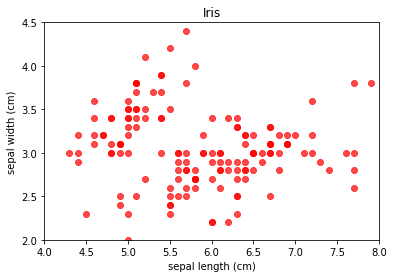

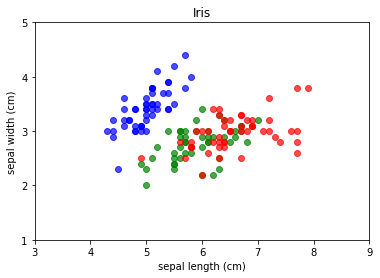

In [19]:
import matplotlib.pyplot as plt
import matplotlib
from sklearn import datasets

iris = datasets.load_iris() 
# print(iris.data)
# print(iris.target)
# print(iris.feature_names)
# print(iris.target_names)
sepal_length = iris.data[:, iris.feature_names.index('sepal length (cm)')]
sepal_width = iris.data[:, iris.feature_names.index('sepal width (cm)')]

def basic_plt():
    plt.scatter(sepal_length[:], sepal_width[:], color='r',
            marker='o', alpha=0.7)

    plt.title('Iris')
    plt.xlabel('sepal length (cm)')
    plt.ylabel('sepal width (cm)')
    plt.axis([4., 8. ,2., 4.5])

basic_plt()
plt.show()

### c ###
# basic_plt()
plt.axis([3, 9, 1, 5])

### d ###
plt.xticks(np.arange(3, 10))
plt.yticks(np.arange(1, 6))

### e ###
for target in set(iris.target):
    i = target == iris.target
    plt.scatter(sepal_length[i], sepal_width[i], color='bgr'[target],
                marker='o', alpha=0.7)

plt.title('Iris')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

['setosa' 'versicolor' 'virginica']


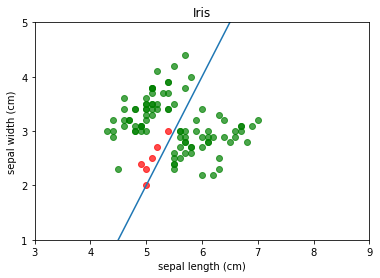

In [20]:
print(iris.target_names)
plt.axis([3, 9, 1, 5])

### d ###
plt.xticks(np.arange(3, 10))
plt.yticks(np.arange(1, 6))

### e ###


plt.title('Iris')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
args = np.arange(3, 10)
fun = np.vectorize(lambda x: 2*x - 8)
below = fun(sepal_length) > sepal_width
above = np.logical_not(below)
for target in set(iris.target):
    if (iris.target_names[target] == 'virginica'):
        continue
    i = target == iris.target
    ab = np.logical_and(i, above)
    be = np.logical_and(i, below)
    
    plt.scatter(sepal_length[ab], sepal_width[ab], color='gr'[target],
                marker='o', alpha=0.7)
    plt.scatter(sepal_length[be], sepal_width[be], color='rg'[target],
                marker='o', alpha=0.7)
plt.plot(args, fun(args))
plt.show()

['setosa' 'versicolor' 'virginica']


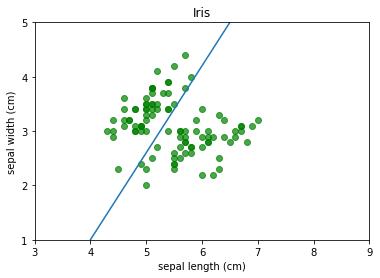

In [21]:
print(iris.target_names)
plt.axis([3, 9, 1, 5])

plt.xticks(np.arange(3, 10))
plt.yticks(np.arange(1, 6))
plt.title('Iris')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
args = np.arange(3, 10)
fun = np.vectorize(lambda x: 1.6*x - 5.4)
below = fun(sepal_length) > sepal_width
above = np.logical_not(below)
for target in set(iris.target):
    if (iris.target_names[target] == 'virginica'):
        continue
    i = target == iris.target
    ab = np.logical_and(i, above)
    be = np.logical_and(i, below)
    
    plt.scatter(sepal_length[ab], sepal_width[ab], color='gr'[target],
                marker='o', alpha=0.7)
    plt.scatter(sepal_length[be], sepal_width[be], color='rg'[target],
                marker='o', alpha=0.7)
plt.plot(args, fun(args))
plt.show()

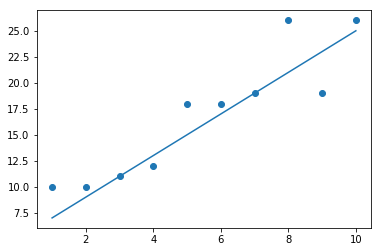

8.4970583145


In [22]:
from __future__ import division
args = np.arange(1, 11)
ys = [10, 10, 11, 12, 18, 18, 19, 26, 19, 26]
plt.scatter(args, ys)
fun = np.vectorize(lambda x: 2.0 * x + 5.)
plt.plot(args, fun(args))
plt.show()

def dist(a, b, x, y):
    return np.absolute(a * x - y + b) / np.sqrt(a*a + 1)

distSum = 0.
for i in np.arange(args.shape[0]):
    distSum += dist(2.0, 5.0, args[i], ys[i])
#     print(dist(2, 5, args[i], ys[i]))
print(distSum)

1.83636363636
6.8
8.52141696575


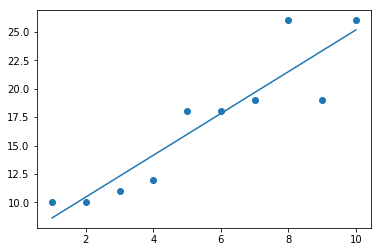

In [23]:
def a_regr(xs, ys):
    n = xs.shape[0]
    X = np.sum(xs)
    Y = np.sum(ys)
    XY = np.sum(xs * ys)
    XX = np.sum(xs * xs)
    return (n*XY - X*Y)/(n*XX - X*X)
def b_regr(a, xs, ys):
    n = xs.shape[0]
    X = np.sum(xs)
    Y = np.sum(ys)
    return (Y - a*X)/n

a = a_regr(args, ys)
b = b_regr(a, args, ys)
print(a)
print(b)

distSum = 0.
for i in np.arange(args.shape[0]):
    distSum += dist(a, b, args[i], ys[i])
#     print(dist(a, b, args[i], ys[i]))
print(distSum)

plt.scatter(args, ys)
fun = np.vectorize(lambda x: a*x + b)
plt.plot(args, fun(args))
plt.show()

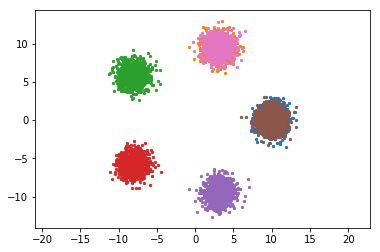

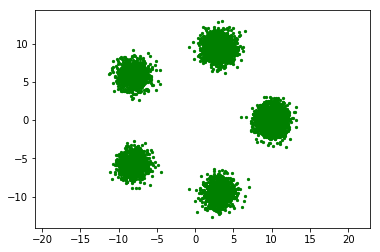

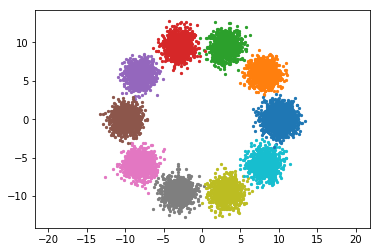

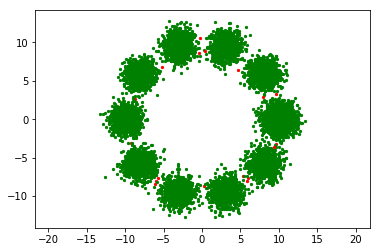

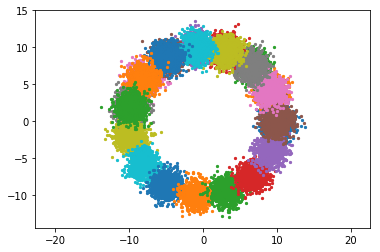

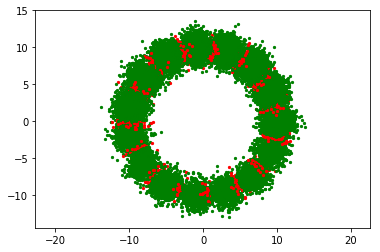

In [24]:
r = 10.
def centers(N):
    xs = np.vectorize(lambda n: r * np.cos(2*np.pi*n/N))
    ys = np.vectorize(lambda n: r * np.sin(2*np.pi*n/N))
    x = xs(np.arange(N))
    y = ys(np.arange(N))
    return (x, y)
def generate_groups(d, K):
    c = np.array(centers(d)).T
    points = []
    for i in np.arange(K):
        xs = np.random.normal(c[i % c.shape[0]][0], 1., 1000)
        ys = np.random.normal(c[i % c.shape[0]][1], 1., 1000)
        points.append((i % c.shape[0], (xs, ys)))
        plt.scatter(xs, ys, s = 5.)
    plt.axis('equal')
    plt.show()
    return points 

def dist(x0, y0, x1, y1):
    return (x0 - x1) ** 2 + (y0 - y1) ** 2

def check_closest(d, N):
    points = generate_groups(d, N)
    cents = np.array(centers(d)).T
    for group in points:
        ci = group[0]
        xs = group[1][0]
        ys = group[1][1]
        r_x = []
        r_y = []
        g_x = []
        g_y = []
        for i in np.arange(xs.shape[0]):
            x = xs[i]
            y = ys[i]
            d = dist(cents[ci][0], cents[ci][1], x, y)
            added = False
            for cis in np.arange(cents.shape[0]):
                if dist(cents[cis][0], cents[cis][1], x, y) < d:
                    r_x.append(x)
                    r_y.append(y)
                    added = True
                    break
            if (added == False):
                g_x.append(x)
                g_y.append(y)
        plt.scatter(r_x, r_y, color = 'r', s = 5.)
        plt.scatter(g_x, g_y, color = 'g', s = 5.)
    plt.axis('equal')
    plt.show()        
        
check_closest(5, 7)
check_closest(10, 11)
check_closest(15, 23)